In [2]:
import pandas as pd
import numpy as np

In [9]:
data = pd.read_csv('Crop_recommendation.csv')

In [11]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [32]:
data.rename(columns={'N': 'Nitrogen'}, inplace=True)

In [52]:
data.rename(columns={'P': 'Phosphorus'}, inplace=True)

In [54]:
data.rename(columns={'K': 'Potassium'}, inplace=True)

In [60]:
data.head

<bound method NDFrame.head of       Nitrogen  Potasium  Potassium  temperature   humidity        ph  \
0           90        42         43    20.879744  82.002744  6.502985   
1           85        58         41    21.770462  80.319644  7.038096   
2           60        55         44    23.004459  82.320763  7.840207   
3           74        35         40    26.491096  80.158363  6.980401   
4           78        42         42    20.130175  81.604873  7.628473   
...        ...       ...        ...          ...        ...       ...   
2195       107        34         32    26.774637  66.413269  6.780064   
2196        99        15         27    27.417112  56.636362  6.086922   
2197       118        33         30    24.131797  67.225123  6.362608   
2198       117        32         34    26.272418  52.127394  6.758793   
2199       104        18         30    23.603016  60.396475  6.779833   

        rainfall   label  
0     202.935536    rice  
1     226.655537    rice  
2     263.96

In [63]:
data[data.isnull().any(axis=1)].head()

,Nitrogen,Potasium,Potassium,temperature,humidity,ph,rainfall,label


In [66]:
before_rows = data.shape[0]

In [68]:
print(before_rows)

2200


In [74]:
data = data.dropna()

In [78]:
after_rows = data.shape[0]

In [80]:
print(after_rows)

2200


In [82]:
before_rows - after_rows

0

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn.metrics import accuracy_score

In [87]:
X = data.drop('label', axis=1)
y = data['label']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
model = RandomForestClassifier(random_state=42)

In [93]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [95]:
y_pred = model.predict(X_test)

In [97]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.99


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

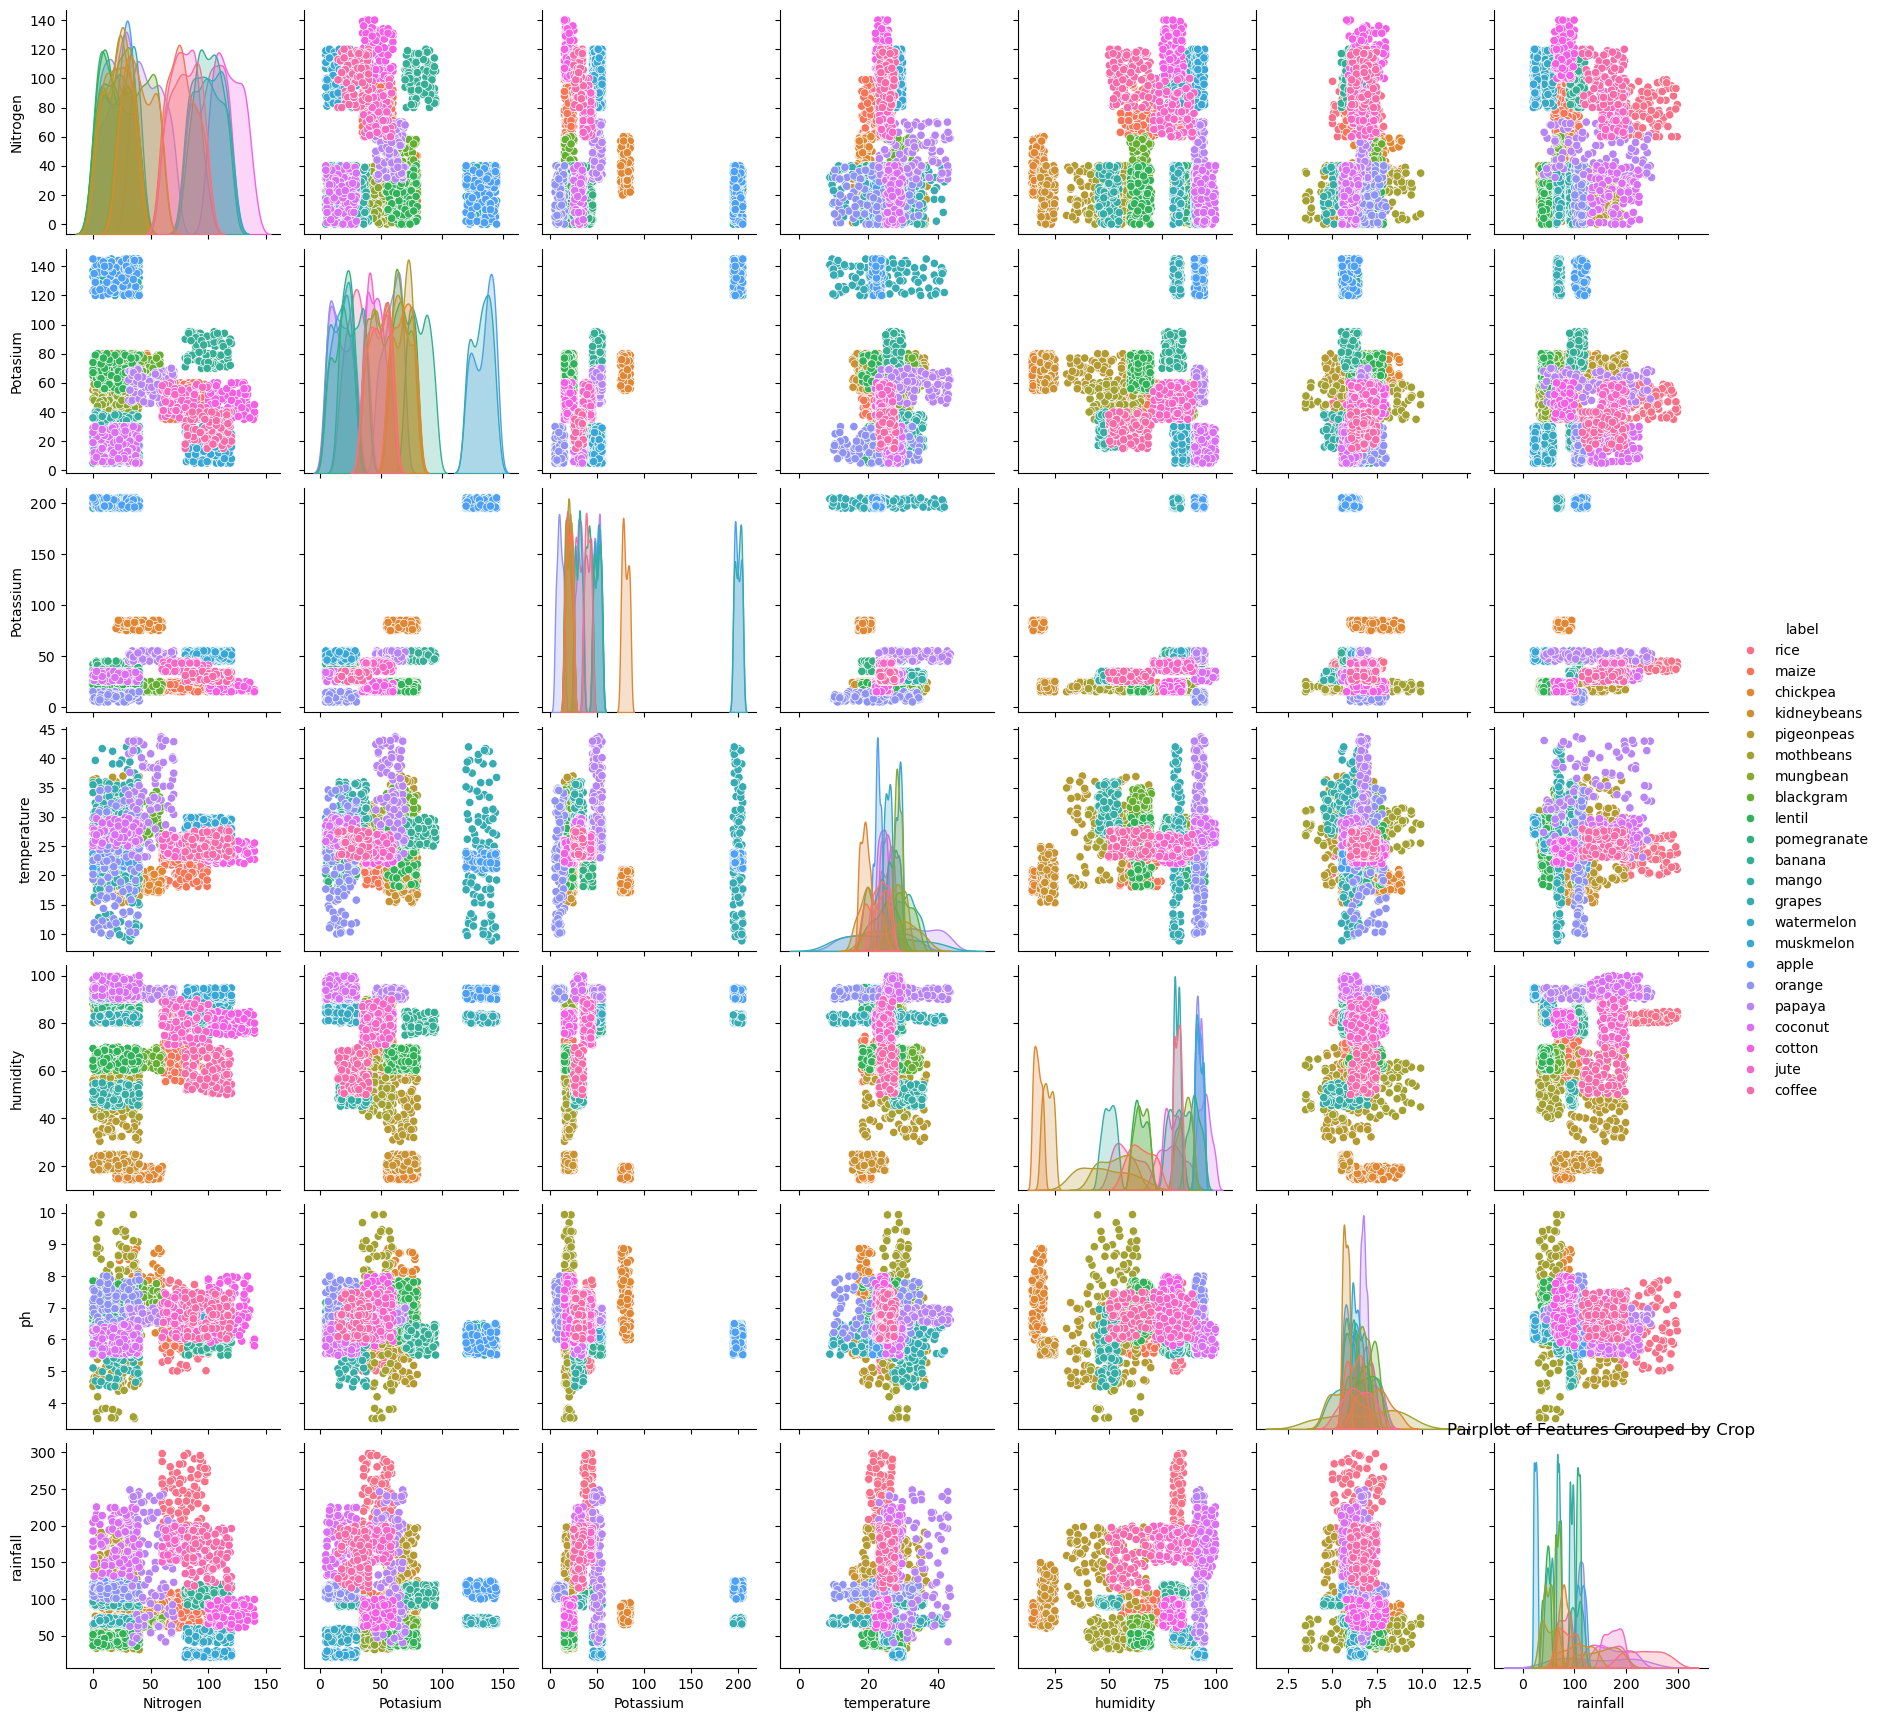

In [106]:
sns.pairplot(data, hue='label', diag_kind='kde')
plt.title("Pairplot of Features Grouped by Crop")
plt.show()

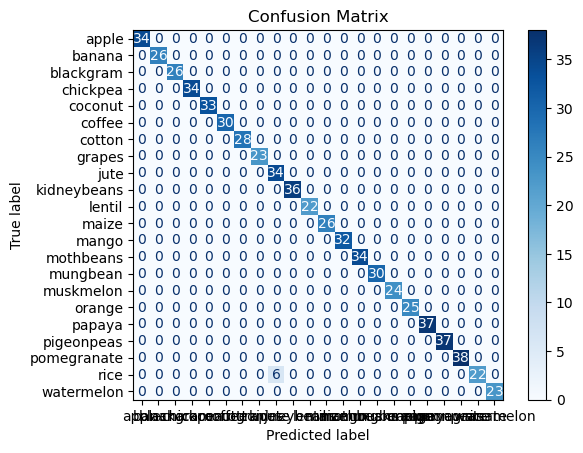

In [113]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

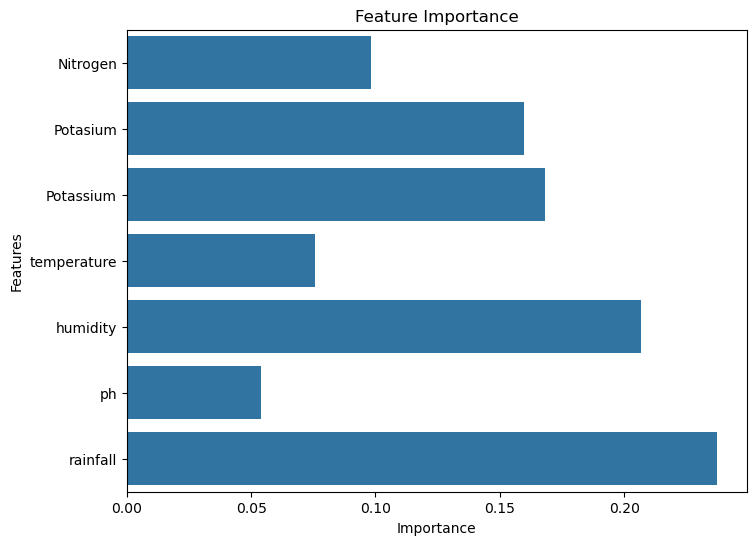

In [117]:
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

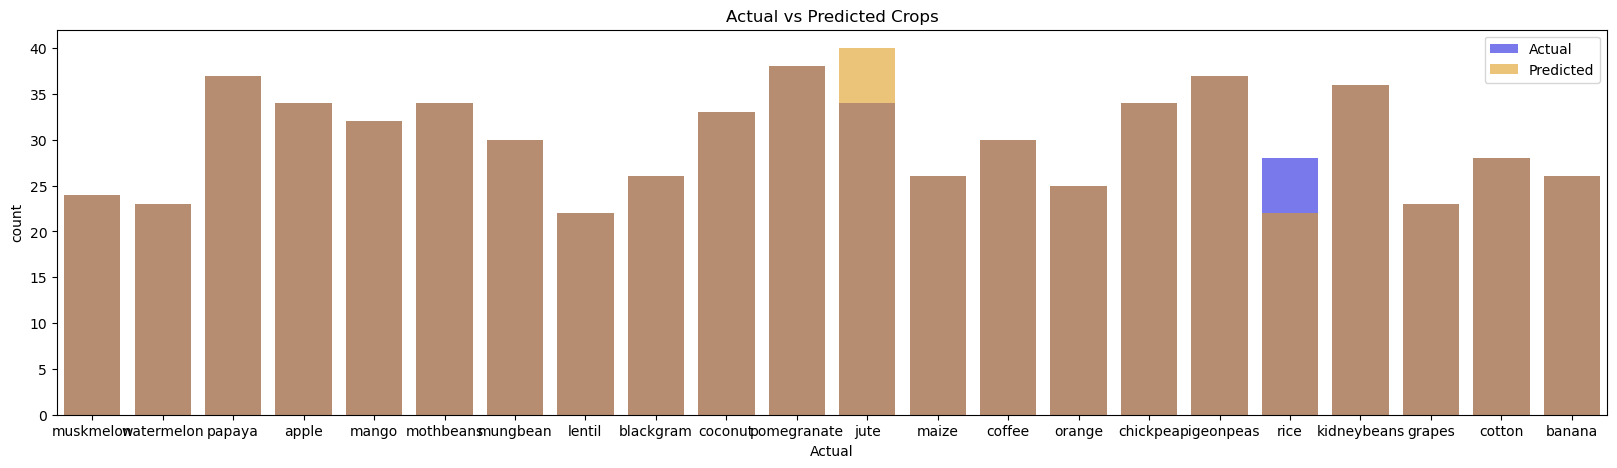

In [153]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(20, 5))
sns.countplot(x='Actual', data=results, label='Actual', color='blue', alpha=0.6)
sns.countplot(x='Predicted', data=results, label='Predicted', color='orange', alpha=0.6)
plt.title("Actual vs Predicted Crops")
plt.legend()
plt.show()

In [169]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)